<a href="https://colab.research.google.com/github/Albieri-Ray/Albieri_DML/blob/main/Albieri_Entregable_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación y Configuración

In [1]:
# Importando librerías

import numpy as np
import pandas as pd

# Scikit-Learn 
import sklearn

# Configuración de tamaño de gráficos matplotlib
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Cargar seaborn 
import seaborn as sns
sns.set(style="whitegrid", color_codes = True)
sns.set(rc={'figure.figsize':(10,6)})

### Importando Datos

In [2]:
# leer la data desde una archivo csv
BCCP = pd.read_csv('Bank Customer Churn Prediction.csv')

In [3]:
# Visualizar parte de la tabla
BCCP.head(8)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1


### Analizando Datos 

In [4]:
BCCP.dtypes

customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

<Axes: xlabel='churn', ylabel='count'>

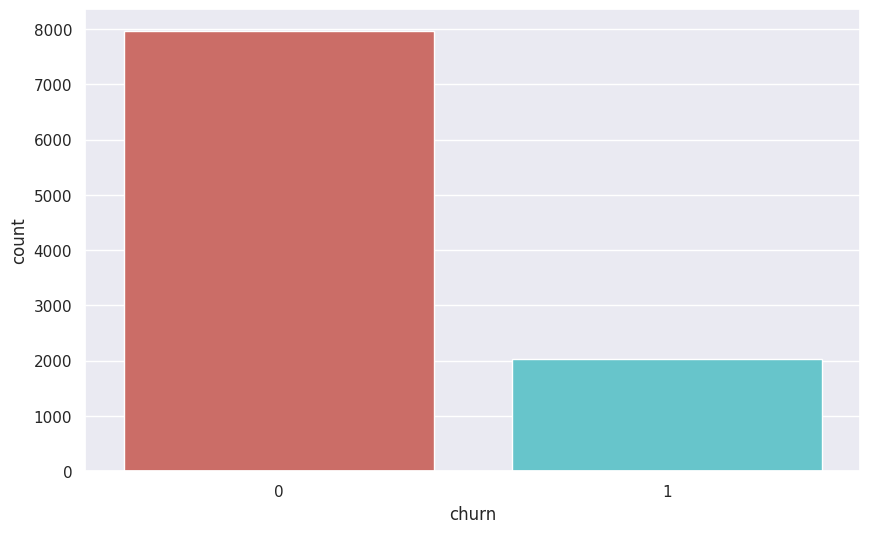

In [5]:
# Analizando el target 
sns.countplot(x='churn', data = BCCP, palette = 'hls')

In [16]:
BCCP.groupby(['tenure']).agg({"customer_id":"count",
                              "credit_score":"mean",
                              "age":"mean"})

,customer_id,credit_score,age
tenure,,,
0,413,652.043584,39.186441
1,1035,648.806763,39.428986
2,1048,652.832061,39.058206
3,1009,650.530228,39.028741
4,989,651.502528,38.239636
5,1012,650.527668,39.287549
6,967,647.380558,38.862461
7,1028,649.606031,38.367704
8,1025,647.749268,38.450732


In [10]:
BCCP.age.mean()

38.9218

In [13]:
print(f'Edad minima: {BCCP.age.min()}')
print(f'Edad maximo: {BCCP.age.max()}')

Edad minima: 18
Edad maximo: 92


<Axes: xlabel='gender', ylabel='count'>

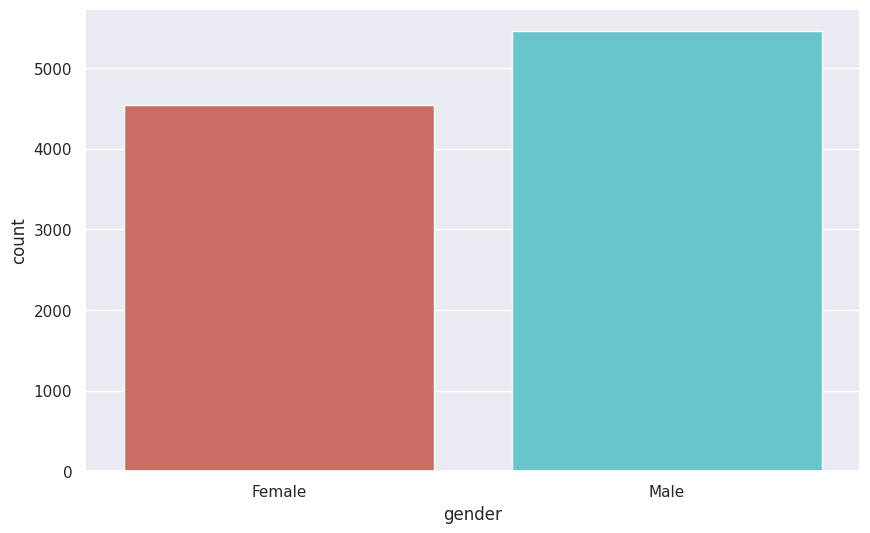

In [17]:
sns.countplot(x='gender', data = BCCP, palette = 'hls')

<Axes: xlabel='gender', ylabel='churn'>

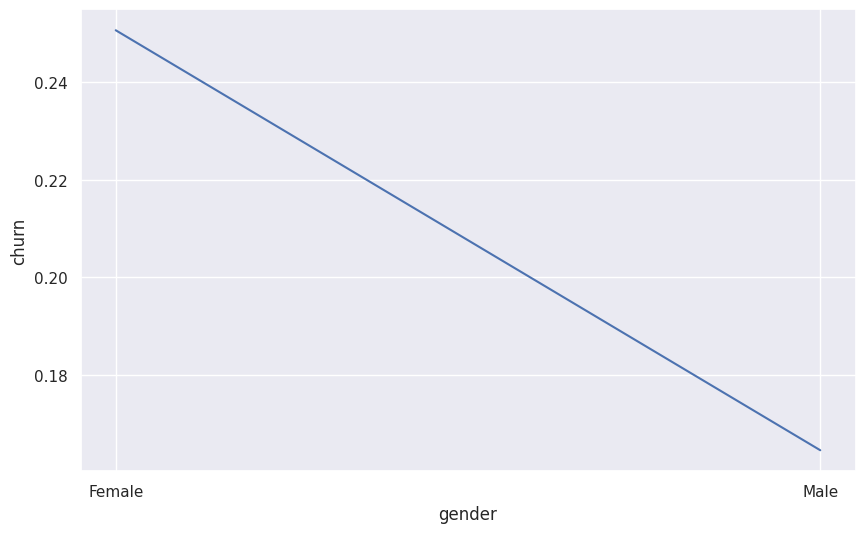

In [25]:
temp_1 = BCCP.groupby(['gender']).agg({"customer_id":"count",
                           "churn" :"mean"}).reset_index()

sns.lineplot(x = 'gender', y = 'churn', data = temp_1)

In [26]:
temp_1

,gender,customer_id,churn
0,Female,4543,0.250715
1,Male,5457,0.164559


<Axes: xlabel='edad_cat', ylabel='churn'>

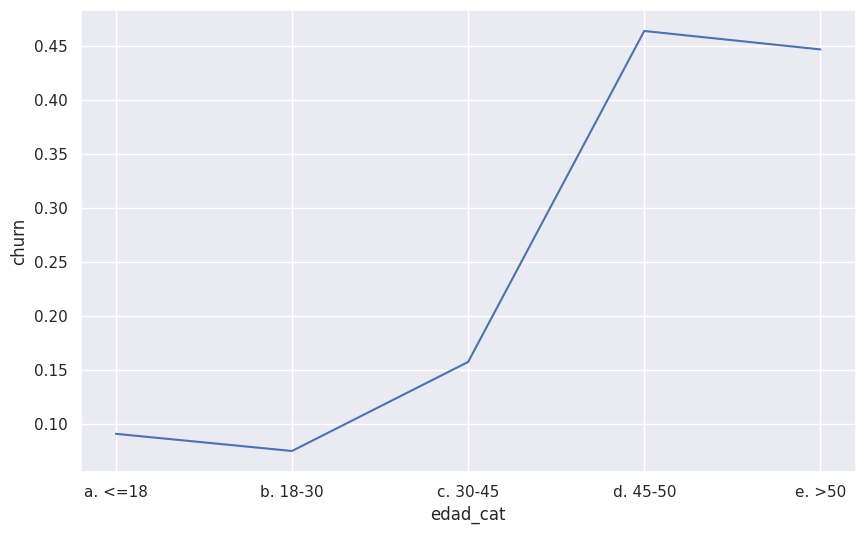

In [31]:
from math import isnan

def catedad(x):
  if isnan(x):
    return 'missing'
  elif x <= 18:
    return 'a. <=18'
  elif x <= 30:
    return 'b. 18-30'
  elif x <= 45:
    return 'c. 30-45'
  elif x <= 50:
    return 'd. 45-50'
  else:
    return 'e. >50'

temp_2 = BCCP.copy()
temp_2 = temp_2.dropna()
temp_2['edad_cat'] = BCCP.age.apply(lambda x: catedad(x))

sns.lineplot(x = 'edad_cat', y = 'churn', 
             data = temp_2.groupby(['edad_cat']).agg({"customer_id":"count", 
                                                      "churn" :"mean"}).reset_index())


In [58]:
# Verificar si existen valores especiales
variable = BCCP.gender
for v in variable:
  if v.count('@') > 0:
    print(v)
  elif v.count('#') > 0:
    print(v)
  elif v.count('&') > 0:
    print(v)
  elif v.count('$') > 0:
    print(v)
  elif v == 'x':
    print(v)
  elif v == 'XNA':
    print(v)
  elif v == '#VALUE!':
    print(v)

In [57]:
# Verificar si existen valores especiales
for variable in BCCP.columns.tolist():
  for v in variable:
    if v.count('@') > 0:
      print(v)
    elif v.count('#') > 0:
      print(v)
    elif v.count('&') > 0:
      print(v)
    elif v.count('$') > 0:
      print(v)
    elif v == 'x':
      print(v)
    elif v == 'XNA':
      print(v)
    elif v == '#VALUE!':
      print(v)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
<ipython-input-65-10026476e79e>:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(temp_2['age_cat'], palette = 'hls', discrete=True)


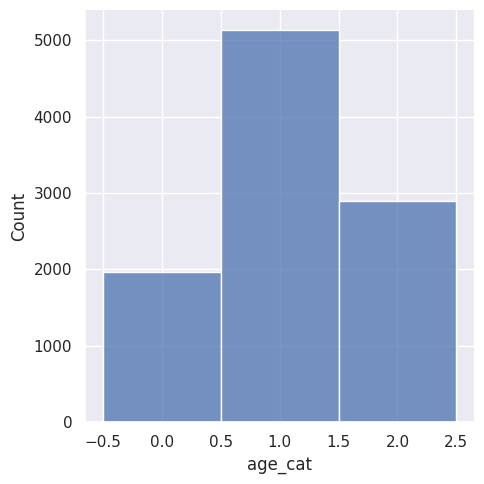

In [65]:
# Discretizar variable con kBinsDiscretizer

from sklearn.preprocessing import KBinsDiscretizer

temp_2['age_cat'] = KBinsDiscretizer(n_bins = 6, 
                                   encode = 'ordinal',
                                   strategy = "quantile").fit_transform(temp_2[['age']].fillna(temp_2[['age']].mean()))
  
sns.displot(temp_2['age_cat'], palette = 'hls', discrete=True)

<ipython-input-66-fadb16d61296>:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  temp = temp.fillna(temp.mean())


<Axes: xlabel='age_rango', ylabel='churn'>

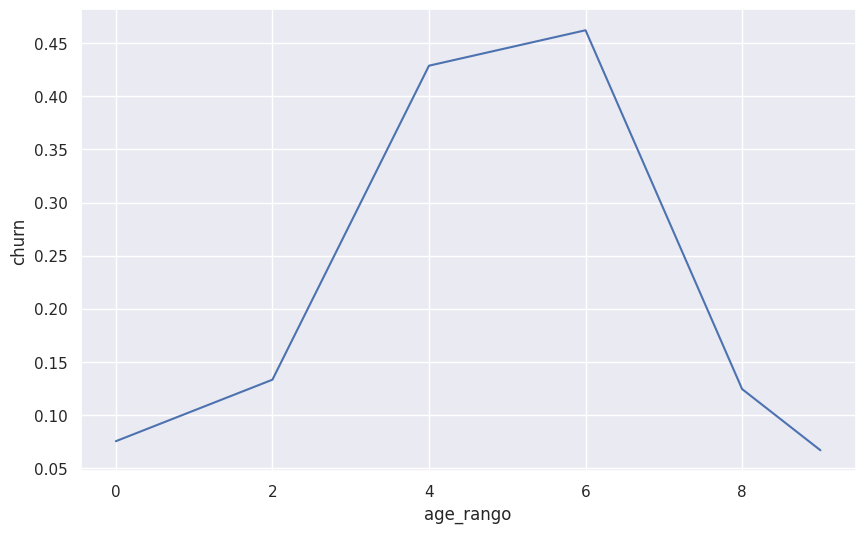

In [66]:
# Discretizar variables
from sklearn.preprocessing import KBinsDiscretizer

var = 'age'
temp = BCCP.copy()
temp = temp.fillna(temp.mean())
discretizer = KBinsDiscretizer(n_bins = 10, 
                               encode = 'ordinal',
                               strategy = "uniform").fit(np.array(temp[var]).reshape(-1, 1))

temp[var + '_rango'] = discretizer.transform(np.array(temp[var]).reshape(-1, 1))

# Interpretación del ratio de evento por tramo de variable numérica
sns.lineplot(data = temp.groupby(var + '_rango').agg({'churn': 'mean'}).reset_index(),
             x = var + '_rango',
             y = 'churn')

### Muestreo Train/Test

In [67]:
# Muestreo de data
from sklearn.model_selection import train_test_split

train, test = train_test_split(BCCP,
                               test_size = 0.3,
                               random_state = 237)

### Tratamiento de variables categoricas

In [68]:
categorical_features = ['gender',
                        'country', 
                        'credit_card',
                        'active_member'
                       ]

numerical_features = list(set(BCCP.columns.tolist()) - set(categorical_features + ['customer_id', 'churn']))    

In [69]:
numerical_features

['age',
 'products_number',
 'tenure',
 'estimated_salary',
 'balance',
 'credit_score']

In [ ]:
RIC = np.percentile(BCCP.Age.dropna(),75) - np.percentile(BCCP.Age.dropna(),25)
RIC

17.875

In [ ]:
cv_age = np.std(valores,axis =0)/ np.mean(valores)
cv_age

0.1622508028597077

In [ ]:
cv_fare = np.std(BCCP.Fare.dropna(),axis =0)/ np.mean(BCCP.Fare.dropna())
cv_fare

1.5422063630081666

<Axes: ylabel='Fare'>

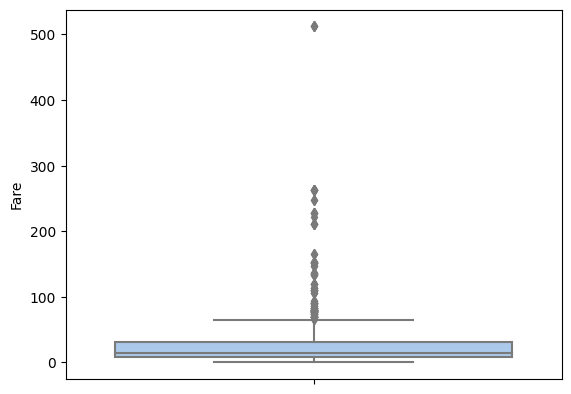

In [ ]:
sns.set_palette ('pastel')
sns.boxplot(y = BCCP['Fare'])

<Axes: ylabel='Age'>

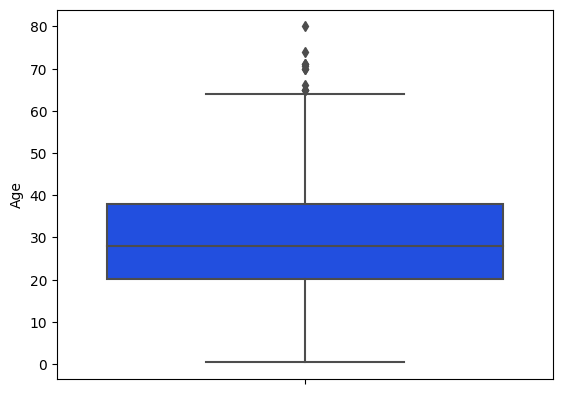

In [ ]:
sns.set_palette('bright')
sns.boxplot(y = BCCP.Age)

In [ ]:
### Identificación de Outliers por Rango Intercuantilico

<img src="https://miro.medium.com/max/1400/1*2c21SkzJMf3frPXPAR_gZA.png" width="500" 
     height="300" > 

In [ ]:
# Estadisticos básicos de la tabla
BCCP.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


<Axes: >

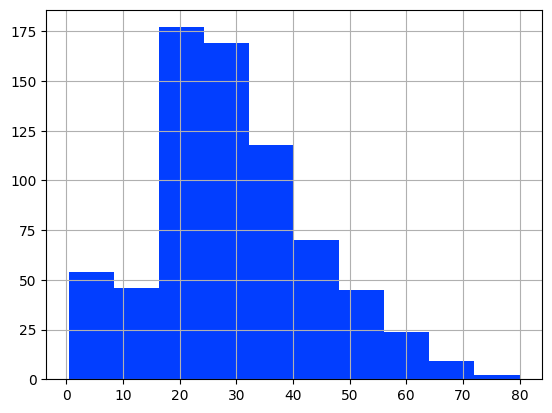

In [ ]:
BCCP.Age.hist()

In [ ]:
# Z - score
# amplitud: 1.5

a = BCCP.Age.dropna()

Q3 = np.percentile(a, 75)
Q1 = np.percentile(a, 25)
RIC = Q3 - Q1

ls = Q3 + 1.5*RIC
li = Q1 - 1.5*RIC

BCCP['Age_t'] = BCCP.Age.apply(lambda x: ls if x > ls
                                          else li if x < li
                                          else x)

<Axes: >

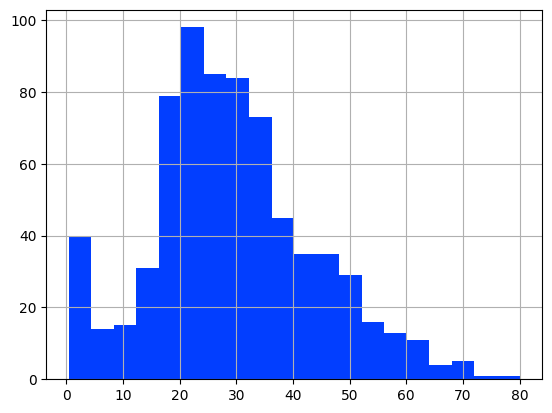

In [ ]:
BCCP['Age'].hist(bins = 20)

<Axes: >

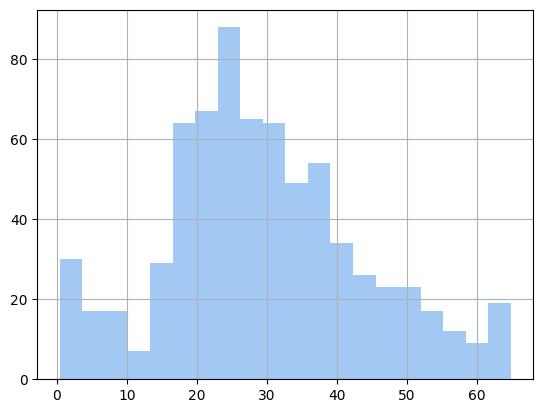

In [ ]:
sns.set_palette('pastel')
BCCP['Age_t'].hist(bins = 20)

### Identificación de Outliers por Percentiles

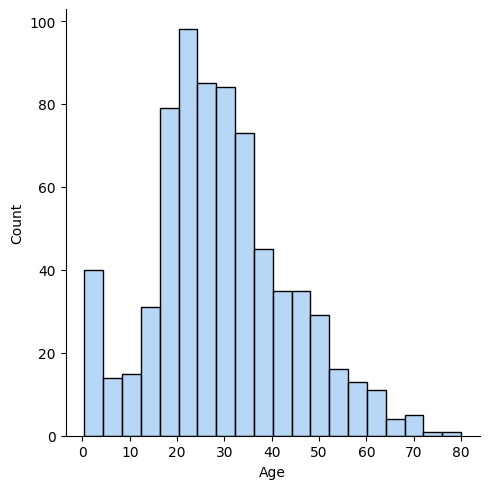

In [ ]:
# Histograma en seaborn

sns.displot(BCCP, x = 'Age', bins=20)

In [ ]:
arry = np.array(BCCP.Fare.dropna())

Q3 = np.percentile(arry,75)
Q1 = np.percentile(arry,25)

RIC = Q3 - Q1

Q3 + 1.5*(RIC)

65.6344

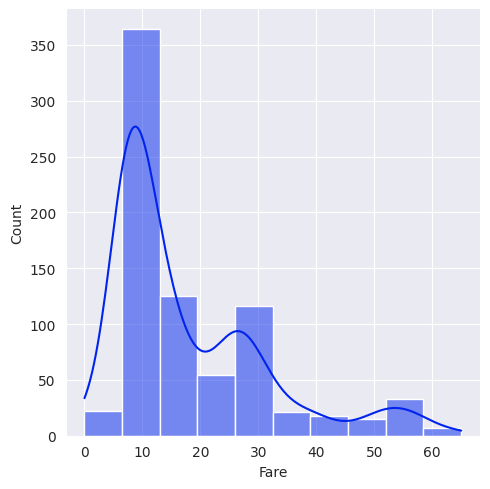

In [ ]:
### HISTOGRAMA

sns.set_style('darkgrid')
sns.set_palette('winter')

sns.displot(BCCP.loc[BCCP.Fare < 65.6344], x = 'Fare', bins = 10, kde =True)

<Axes: >

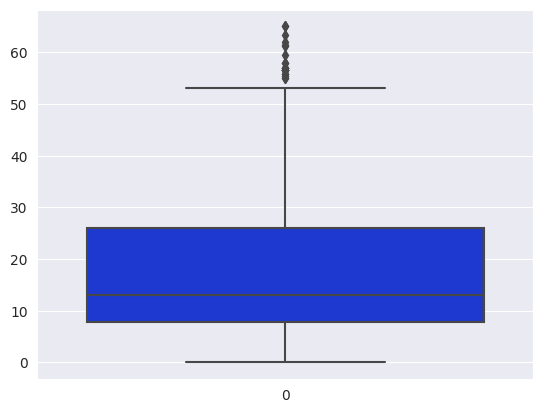

In [ ]:
sns.set_style('darkgrid')
sns.set_palette('winter')

sns.boxplot(BCCP.loc[BCCP.Fare < 65.6344].Fare)

In [ ]:

# Z - score
# amplitud: 3

arry = np.array(BCCP.Fare.dropna())

Q3 = np.percentile(arry, 75)
Q1 = np.percentile(arry, 25)
RIC = np.percentile(arry, 75) - np.percentile(arry, 25)

ls = Q3 + 3*RIC
li = Q1 - 3*RIC

BCCP['Fare_t'] = BCCP.Fare.apply(lambda x: ls if x > ls
                                          else li if x < li
                                          else x)

print(ls)
print(li)

100.2688
-61.358399999999996


<Axes: xlabel='Age', ylabel='Fare_t'>

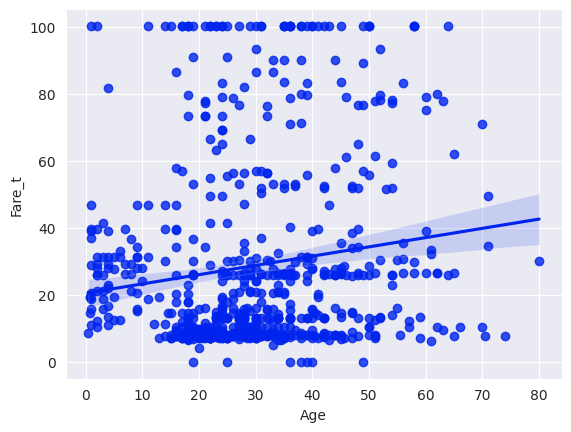

In [ ]:
# scatterplot

sns.regplot(x = 'Age', y = 'Fare_t', data = BCCP)

In [ ]:
pddf = pd.read_csv('HousingData 2.csv')

In [ ]:
pddf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [ ]:
pddf.shape

(506, 14)

In [ ]:
pddf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,486.0,3.611874,8.720192,0.00632,0.081900,0.253715,3.560263,88.9762
ZN,486.0,11.211934,23.388876,0.00000,0.000000,0.000000,12.500000,100.0000
INDUS,486.0,11.083992,6.835896,0.46000,5.190000,9.690000,18.100000,27.7400
CHAS,486.0,0.069959,0.255340,0.00000,0.000000,0.000000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.538000,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.208500,6.623500,8.7800
AGE,486.0,68.518519,27.999513,2.90000,45.175000,76.800000,93.975000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.207450,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.000000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.000000,666.000000,711.0000


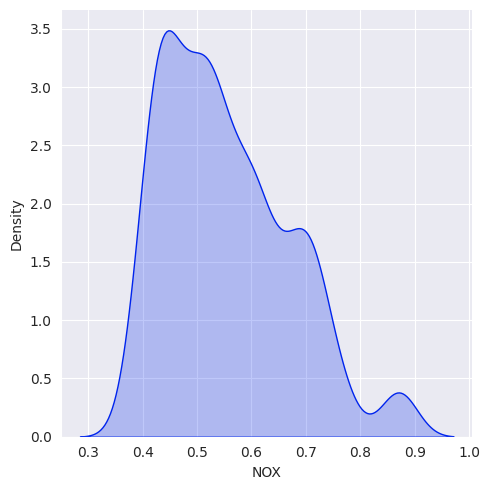

In [ ]:
import seaborn as sns
sns.displot(pddf.NOX, kind = 'kde', fill= True)

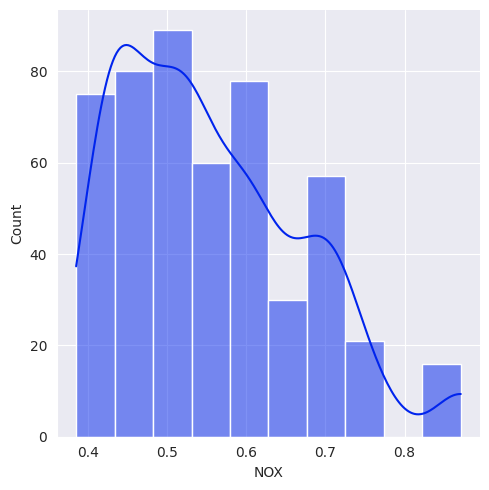

In [ ]:
sns.displot(pddf, x='NOX', bins = 10, kde = True)

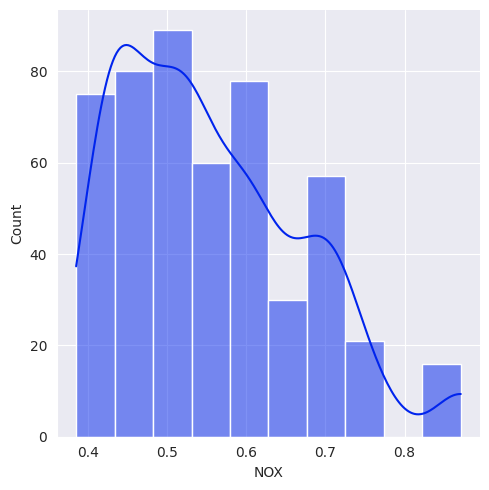

In [ ]:
sns.displot(pddf.NOX, bins = 10, kde = True)

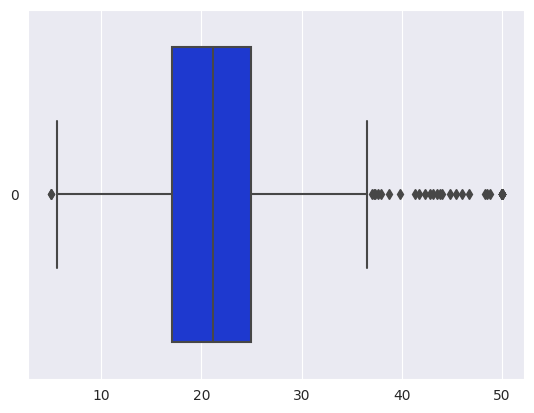

In [ ]:
ax = sns.boxplot(data=pddf.MEDV, orient="h")

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(pddf,
                               test_size = 0.7,
                               random_state = 123)

<Axes: xlabel='NOX', ylabel='MEDV'>

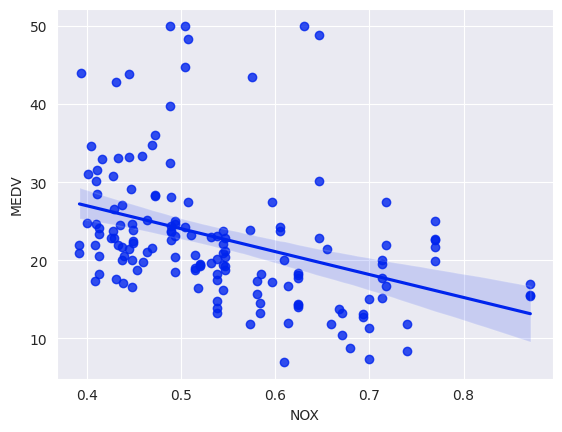

In [ ]:
sns.regplot(x = train.NOX, y = train.MEDV, data = BCCP)

In [ ]:
# Dando formato a nuestra tabla resumen

pdResume = train.describe().transpose()

pdResume.reset_index(inplace = True)
pdResume.rename(columns = {'index' : 'feature',
                           '25%' : 'Q1',
                           '50%' : 'median',
                           '75%' : 'Q3'}, inplace = True)

In [ ]:
train.shape[0]

151

In [ ]:
pdResume[['count']]/train.shape[0]

,count
1,0.933775
2,0.947020
6,0.953642
12,0.960265
0,0.966887
3,0.966887
4,1.000000
5,1.000000
7,1.000000
8,1.000000


In [ ]:
pdResume[['missing_rate']] = 1 - pdResume[['count']]/train.shape[0]
pdResume.sort_values(by = 'missing_rate', ascending = False, inplace = True)
pdResume

,feature,count,mean,std,min,Q1,median,Q3,max,missing_rate
1,ZN,141.0,11.145390,24.305315,0.00000,0.000000,0.000000,0.000000,100.0000,0.066225
2,INDUS,143.0,10.228741,6.783044,0.74000,4.675000,8.140000,18.100000,27.7400,0.052980
6,AGE,144.0,66.257639,28.217830,6.20000,41.850000,72.800000,91.425000,100.0000,0.046358
12,LSTAT,145.0,12.368138,7.002973,2.94000,6.900000,11.100000,16.350000,34.7700,0.039735
0,CRIM,146.0,3.067422,10.096938,0.01432,0.060948,0.216865,1.376702,88.9762,0.033113
3,CHAS,146.0,0.034247,0.182488,0.00000,0.000000,0.000000,0.000000,1.0000,0.033113
4,NOX,151.0,0.543616,0.112607,0.39200,0.448000,0.520000,0.619000,0.8710,0.000000
5,RM,151.0,6.292470,0.721273,3.56100,5.935000,6.176000,6.592500,8.7250,0.000000
7,DIS,151.0,3.998854,2.283737,1.16910,2.208500,3.495200,5.202000,12.1265,0.000000
8,RAD,151.0,8.649007,8.439746,1.00000,4.000000,5.000000,8.000000,24.0000,0.000000


In [ ]:
train[['NOX', 'MEDV']].corr()

In [ ]:
# Calculando las correlaciones de todas las variables con el target

correlations = train.corr()[['MEDV']]
correlations.reset_index(inplace = True)
correlations.rename(columns = {'index' : 'feature',
                               'MEDV' : 'corr'}, inplace = True)

In [ ]:
# Cruzando correlaciones con la tabla de resumen original

pdResume2 = pd.merge(pdResume, correlations, on = 'feature')
pdResume2.head()

,feature,count,mean,std,min,Q1,median,Q3,max,missing_rate,corr
0,ZN,141.0,11.145390,24.305315,0.00000,0.000000,0.000000,0.000000,100.0000,0.066225,0.287086
1,INDUS,143.0,10.228741,6.783044,0.74000,4.675000,8.140000,18.100000,27.7400,0.052980,-0.501980
2,AGE,144.0,66.257639,28.217830,6.20000,41.850000,72.800000,91.425000,100.0000,0.046358,-0.343585
3,LSTAT,145.0,12.368138,7.002973,2.94000,6.900000,11.100000,16.350000,34.7700,0.039735,-0.685784
4,CRIM,146.0,3.067422,10.096938,0.01432,0.060948,0.216865,1.376702,88.9762,0.033113,-0.299929


In [ ]:
# Ejemplo de apply 
def evaluation(x):
  if x >= 12:
    return True
  else:
    return False

from math import log
pdResume2['mean'].apply(lambda x: evaluation(x))

0     False
1     False
2      True
3      True
4     False
5     False
6     False
7     False
8     False
9     False
10     True
11     True
12     True
13     True
Name: mean, dtype: bool

In [ ]:
pdResume2['abs_corr'] = pdResume2['corr'].apply(lambda x: abs(x))
pdResume2.sort_values(by = 'abs_corr', ascending = False, inplace=True)
pdResume2.head()

,feature,count,mean,std,min,Q1,median,Q3,max,missing_rate,corr,abs_corr
13,MEDV,151.0,22.770861,8.711682,7.000,17.550,21.400,24.7500,50.000,0.000000,1.000000,1.000000
7,RM,151.0,6.292470,0.721273,3.561,5.935,6.176,6.5925,8.725,0.000000,0.719105,0.719105
3,LSTAT,145.0,12.368138,7.002973,2.940,6.900,11.100,16.3500,34.770,0.039735,-0.685784,0.685784
1,INDUS,143.0,10.228741,6.783044,0.740,4.675,8.140,18.1000,27.740,0.052980,-0.501980,0.501980
11,PTRATIO,151.0,18.687417,2.010648,12.600,17.800,19.000,20.2000,22.000,0.000000,-0.450124,0.450124


In [ ]:
# Guardando resultados
pdResume2.to_csv('univariate_assesment.csv', index = 0)